### NLP/NLU Model Which summerizes Medical Research Paper which makes them easier to read for Student
* In this Model We are Replicating Model proposed in paper [2017 PubMed 200k RCT](https://arxiv.org/abs/1710.06071)
* Dateset is freely available at [GITHUB](https://github.com/Franck-Dernoncourt/pubmed-rct)

In [1]:
from helpers import helper as hf
import pandas as pd





In [2]:
from tensorflow import constant

In [3]:
data_dir = "../data/pubmed-rct-master/PubMed_20k_RCT_numbers_replaced_with_at_sign"

In [4]:
train_text_lines = hf.read_lines_from_txt(data_dir+"/train.txt")
test_text_lines = hf.read_lines_from_txt(data_dir+"/test.txt")
dev_text_lines = hf.read_lines_from_txt(data_dir+"/dev.txt")

In [5]:
train_data_dic = hf.extract_para(train_text_lines)
test_data_dic = hf.extract_para(test_text_lines)
dev_data_dic = hf.extract_para(dev_text_lines)


* Data Modeling
```
# object return structure

    return dict:
    {
        "total_para":
        0:
        1:
        .
        .
        .
    }


    0 indexed deic structure
    {
        "entire_para": list of dic object containing target, text eg. [ { target:
                                                                          text:
                                                                         },
                                                                         {
                                                                                ..  
                                                                         }
                                                                       ]
        "total_lines":total lines in para

    }
```

In [6]:
print( "train: ", train_data_dic["total_para"], "test:", 
test_data_dic["total_para"], "test:", 
dev_data_dic["total_para"]  )

train:  15000 test: 2500 test: 2500


In [7]:
len(dev_data_dic[3]["entire_para"]) == dev_data_dic[3]["total_lines"]

False

In [8]:
test_data_dic[2]

{'entire_para': [{'target': 'BACKGROUND',
   'text': 'minimally invasive endovascular aneurysm repair ( evar ) could be a surgical technique that improves outcome of patients with ruptured abdominal aortic aneurysm ( raaa ) .',
   'line_number': 0},
  {'target': 'BACKGROUND',
   'text': 'the aim of this study was to analyse the cost-effectiveness and cost-utility of evar compared with standard open repair ( or ) in the treatment of raaa , with costs per @-day and @-month survivor as outcome parameters .',
   'line_number': 1},
  {'target': 'METHODS',
   'text': 'resource use was determined from the amsterdam acute aneurysm ( ajax ) trial , a multicentre randomized trial comparing evar with or in patients with raaa .',
   'line_number': 2},
  {'target': 'METHODS',
   'text': 'the analysis was performed from a provider perspective .',
   'line_number': 3},
  {'target': 'METHODS',
   'text': 'all costs were calculated as if all patients had been treated in the same hospital ( onze lieve v

In [9]:
test_data_dic[80]

{'entire_para': [{'target': 'OBJECTIVE',
   'text': 'to determine whether plasma sclerostin levels are affected by applying whole-body vibration treatments .',
   'line_number': 0},
  {'target': 'METHODS',
   'text': 'following a pilot study , the pretsent prospective , randomized , controlled single-blind study was performed on @ healthy volunteer women ( ages @ to @ years ) .',
   'line_number': 1},
  {'target': 'METHODS',
   'text': 'subjects were randomly divided into @ groups , and whole-body vibration was applied to the treatment group but not to the controls .',
   'line_number': 2},
  {'target': 'METHODS',
   'text': 'the plasma sclerostin levels were measured before the treatment and at the @th minute after whole-body vibration on the @st , @nd , and @th days of application .',
   'line_number': 3},
  {'target': 'RESULTS',
   'text': 'the plasma sclerostin level measured at @ min after the whole-body vibration treatment increased @ % ( p = @ ) on the @st day and decreased @ % 

In [10]:
dev_data = pd.DataFrame(hf.make_list_of_all_labeled_sentences(dev_data_dic))
test_data = pd.DataFrame(hf.make_list_of_all_labeled_sentences(test_data_dic))
train_data = pd.DataFrame(hf.make_list_of_all_labeled_sentences(train_data_dic))





In [11]:
train_data.head(20)

,target,text,line_number
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0
1,METHODS,a total of @ patients with primary knee oa wer...,1
2,METHODS,outcome measures included pain reduction and i...,2
3,METHODS,pain was assessed using the visual analog pain...,3
4,METHODS,secondary outcome measures included the wester...,4
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5
6,RESULTS,there was a clinically relevant reduction in t...,6
7,RESULTS,the mean difference between treatment arms ( @...,7
8,RESULTS,"further , there was a clinically relevant redu...",8
9,RESULTS,these differences remained significant at @ we...,9


In [12]:
dev_data

,target,text,line_number
0,BACKGROUND,ige sensitization to aspergillus fumigatus and...,0
1,BACKGROUND,it is not clear whether these patients would b...,1
2,OBJECTIVE,we sought to determine whether a @-month cours...,2
3,METHODS,asthmatic patients who were ige sensitized to ...,3
4,METHODS,primary outcomes were improvement in quality o...,4
...,...,...,...
30193,RESULTS,in patients with uncontrolled or untreated hyp...,7
30194,RESULTS,the mean difference in total ipss and ipss-qua...,8
30195,RESULTS,"maximum flow rate , average flow rate , voided...",9
30196,CONCLUSIONS,this study shows that alfuzosin @ mg is effect...,10


In [13]:
train_data.target.value_counts()

target
METHODS        59349
RESULTS        57949
CONCLUSIONS    27166
BACKGROUND     21726
OBJECTIVE      13838
Name: count, dtype: int64

In [14]:
import matplotlib.pyplot as plt
def sentences_count_in_para(data_dic = train_data_dic):
    count = []
    for index in range(len(data_dic) - 1):
        count.append(data_dic[index]["total_lines"])

    return count[1:]
sent_count_in_para = sentences_count_in_para(data_dic = train_data_dic)



(array([2.420e+02, 2.777e+03, 6.127e+03, 3.018e+03, 2.084e+03, 5.890e+02,
        9.600e+01, 5.200e+01, 1.100e+01, 3.000e+00]),
 array([ 4. ,  6.7,  9.4, 12.1, 14.8, 17.5, 20.2, 22.9, 25.6, 28.3, 31. ]),
 <BarContainer object of 10 artists>)

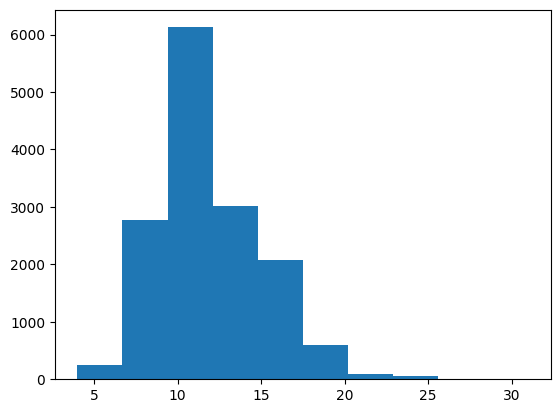

In [15]:
plt.hist(sent_count_in_para)

In [16]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_enc.fit_transform(train_data["target"].to_numpy().reshape(-1,1))
test_labels_one_hot = one_hot_enc.fit_transform(test_data["target"].to_numpy().reshape(-1,1))
val_labels_one_hot = one_hot_enc.fit_transform(dev_data["target"].to_numpy().reshape(-1,1))

# one Hot Encoding done in alphabetical order
# eg. ["BACKGROUND","CONCLUSION","METHODS","OBJECTS","RESULTS"]
# [0 , 0 , 1 , 0 , 0]

test_labels = constant(test_labels_one_hot)
train_labels = constant(train_labels_one_hot)
val_labels = constant(val_labels_one_hot)



C:\Users\braje\miniconda3\envs\ML\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\braje\miniconda3\envs\ML\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\braje\miniconda3\envs\ML\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

train_labels_encoded = label_enc.fit_transform(train_data["target"].to_numpy())
val_labels_encoded = label_enc.fit_transform(dev_data["target"].to_numpy())
test_labels_encoded = label_enc.fit_transform(test_data["target"].to_numpy())



In [18]:
num_classes = len(label_enc.classes_)
class_names = label_enc.classes_

label_enc.inverse_transform([0,4]) # 0 = BACKGROUND
# can access class using label_enc.inverse_transform([0,4])

array(['BACKGROUND', 'RESULTS'], dtype=object)

15-09-23
> Note: DataModeling Almost done 
* Abstract:
    * Labels: 
        1. test_labels: one hot encoded tensors 
        2. train_labels:  one hot encoded tensors shape = (180028, 5)
        3. val_labels:
    * Data:
        1. train_data: pd.DataFrame
        2. dev_data
        3. test_data


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_nv = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_nv.fit(X=train_data["text"], 
            y=train_labels_encoded)




Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [20]:
model_nv.score(X=dev_data["text"],
              y=val_labels_encoded
              )

0.7220014570501357

In [21]:
obj  = [{"text": "liver function tests ( lfts ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up . ",
        "num":4 }]
obj

[{'text': 'liver function tests ( lfts ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up . ',
  'num': 4}]

In [22]:
sum(model_nv.predict(test_data["text"][:100]) == test_labels_encoded[:100])

72

In [25]:
test_data.head()

,target,text,line_number
0,BACKGROUND,this study analyzed liver function abnormaliti...,0
1,RESULTS,a post hoc analysis was conducted with the use...,1
2,RESULTS,liver function tests ( lfts ) were measured at...,2
3,RESULTS,survival analyses were used to assess the asso...,3
4,RESULTS,the percentage of patients with abnormal lfts ...,4


> note: so far we got 72% of accuracy we need more experimenting